<a href="https://colab.research.google.com/github/AiswaryaSgi/Decision-Tree-CART-Gini-Index-/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

#Read the csv file

In [ ]:
df=pd.read_csv("Cryotherapy.csv")

#Perform EDA

In [ ]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [ ]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [ ]:
df.isnull()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [ ]:
df.shape

(90, 7)

In [ ]:
df.tail()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1
89,1,19,8.00,8,1,160,1


#Plotting

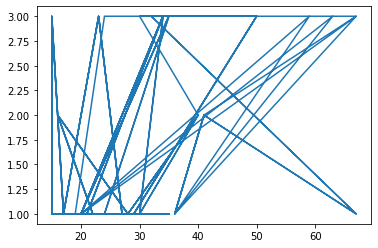

In [ ]:
a=df.age
b=df.Type
plt.plot(a,b)
plt.show()

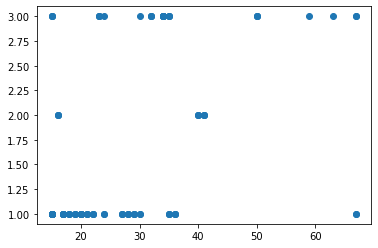

In [ ]:
plt.scatter(a,b)

<BarContainer object of 90 artists>

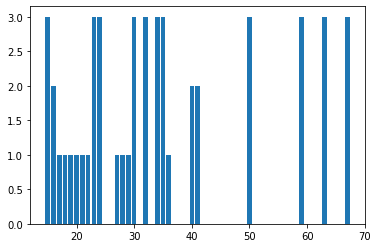

In [ ]:
plt.bar(a,b)

(array([54.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0., 27.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

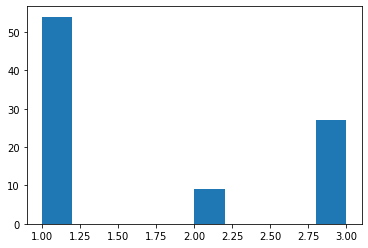

In [ ]:
plt.hist(b)

([<matplotlib.patches.Wedge at 0x7f815e4e43a0>,
 [Text(1.0989965045859735, 0.04697534361569252, ''),
  Text(1.0919797616869076, 0.13259034680626128, ''),
  Text(1.074143095820839, 0.2371004211308456, ''),
  Text(1.0450782296164798, 0.3432367899594745, ''),
  Text(0.9960858100939858, 0.4667044663696806, ''),
  Text(0.9261040417993202, 0.5935750194903449, ''),
  Text(0.8663156606950975, 0.6778622102126781, ''),
  Text(0.7820777113483648, 0.7735337441974358, ''),
  Text(0.7039762552554796, 0.8452321764086316, ''),
  Text(0.6467809901646203, 0.8897608390807462, ''),
  Text(0.5856412230316316, 0.9311414274351748, ''),
  Text(0.5441763392576981, 0.9559665850813462, ''),
  Text(0.5088164166015485, 0.9752465607202927, ''),
  Text(0.47277441015213145, 0.9932191888527448, ''),
  Text(0.433632248391015, 1.0109218927075194, ''),
  Text(0.3913204087315754, 1.0280410194686558, ''),
  Text(0.34068471993080024, 1.0459129608173294, ''),
  Text(0.27626279187797903, 1.0647435699847099, ''),
  Text(0.2213

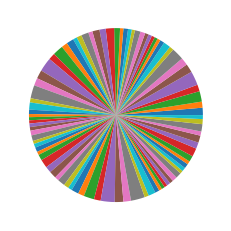

In [ ]:
plt.pie(a)

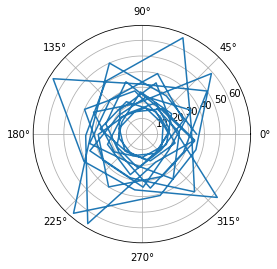

In [ ]:
plt.polar(a)

<ipython-input-16-90f352bd6d48>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b)


<StemContainer object of 3 artists>

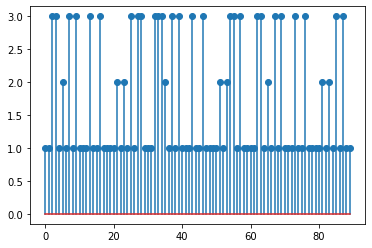

In [ ]:
plt.stem(b)

In [ ]:
x=df.drop('Result_of_Treatment',axis=1)
y=df['Result_of_Treatment']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

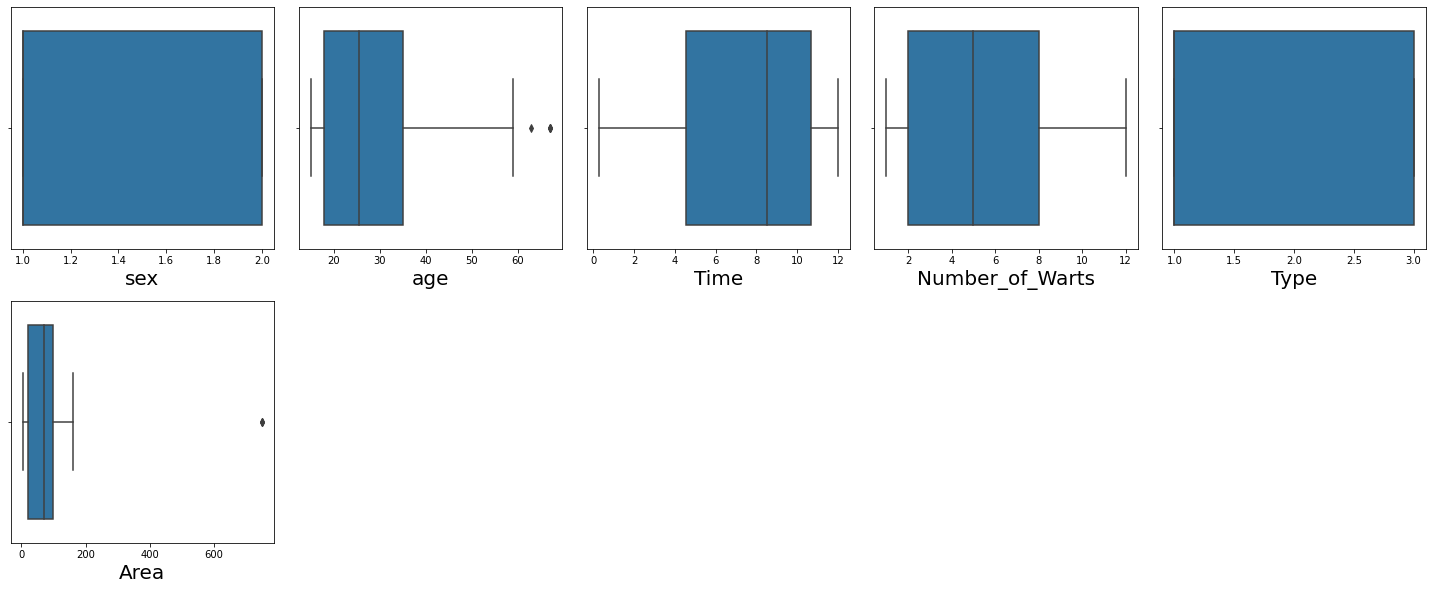

In [ ]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

#Find missing values

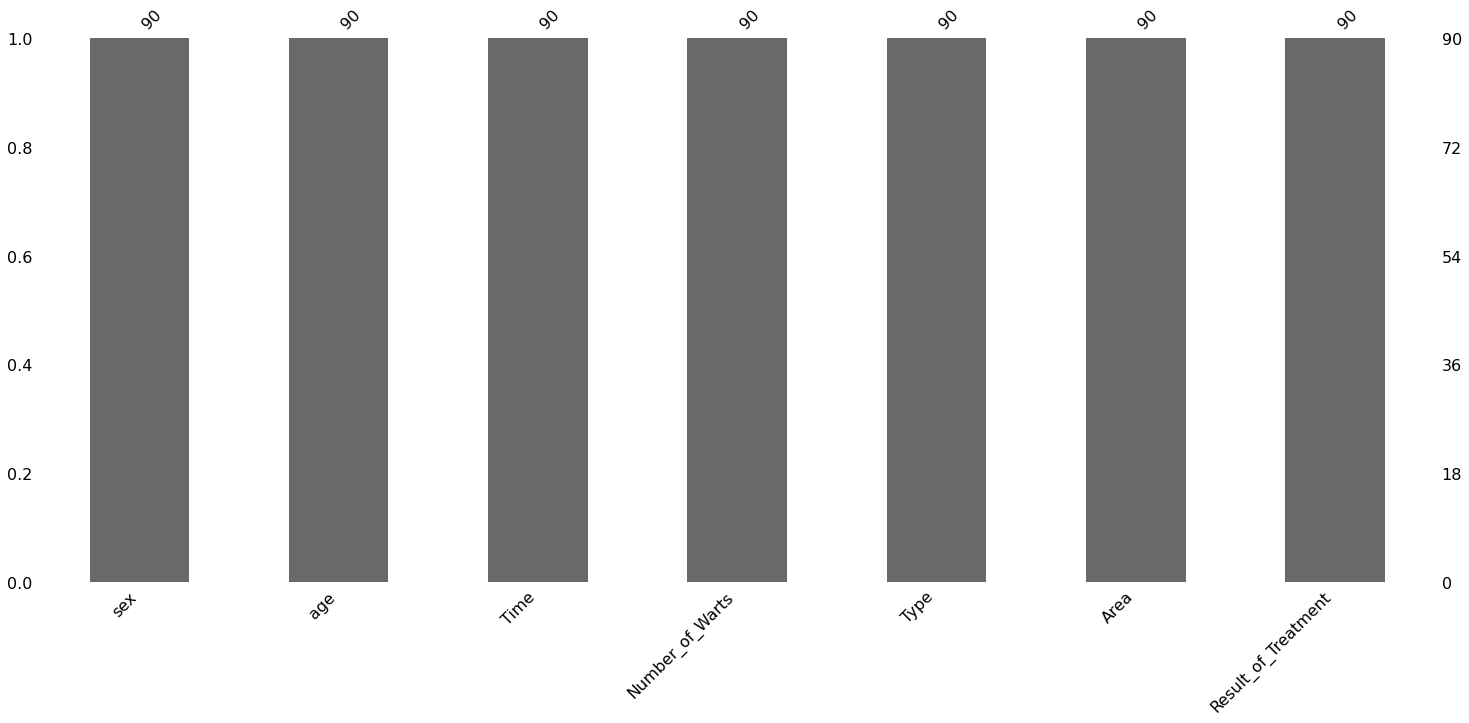

In [ ]:
import missingno as mn
mn.bar(df)
plt.show()

In [ ]:
df.isna().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

#Decision tree using CART(Gini index)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [ ]:
clf=DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=clf.predict(x_test)

#Confusion matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6,  1],
       [ 1, 10]])

#Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8888888888888888

#Decision Tree Visualization

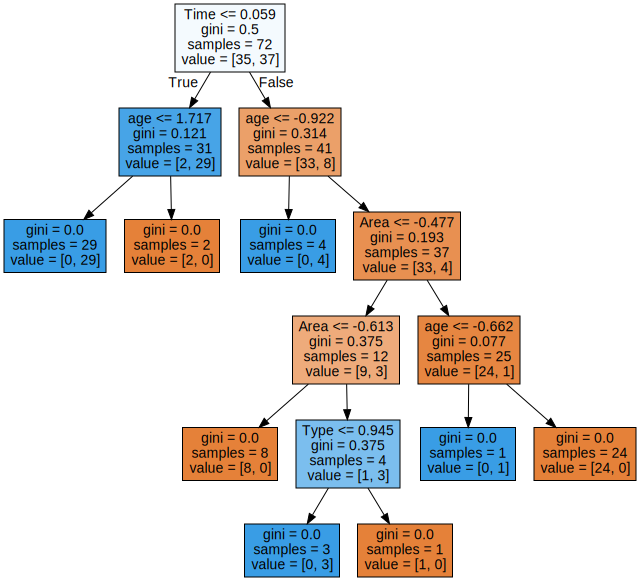

In [ ]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
import datetime
from statistics import mean
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(x_test)

#Variance

In [ ]:
Variance=np.var(pred)
Variance

0.1465459283649831

#Bias

In [ ]:
Sum_of_squared_error=np.mean((np.mean(pred)-y)**2)
Bias=Sum_of_squared_error-Variance
Bias

0.113825948543465

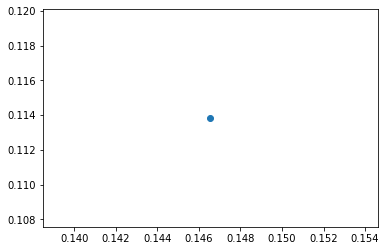

In [ ]:
plt.scatter(Variance,Bias)
plt.show()